In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/CNN Practice Datasets/Movie Recommendation System/ratings.csv")
df1.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [3]:
df1.shape

(100836, 4)

In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/CNN Practice Datasets/Movie Recommendation System/movies.csv")
df2.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
df2.shape

(9742, 3)

In [6]:
movies = pd.merge(df1,df2,on='movieId')
movies.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
movies.shape

(100836, 6)

In [8]:
trend = pd.DataFrame(movies.groupby('title')['rating'].mean())
trend.head(3)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5


In [9]:
trend['total_ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count())
trend.head(3)

,rating,total_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2


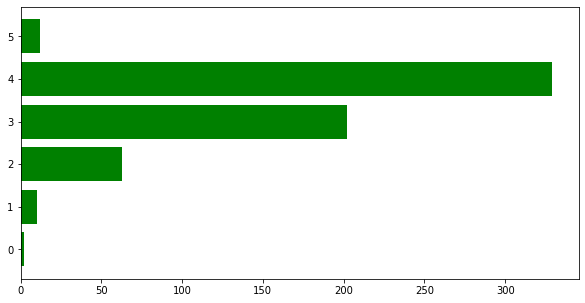

In [10]:
plt.figure(figsize=(10,5))
ax = plt.barh(trend['rating'].round(),trend['total_ratings'],color='g')
plt.show()

In [11]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [12]:
import re

In [13]:
def data_preprocess(text):
  result = []
  for txt in range(len(text)):
    intmdt_feature = re.sub(r'[|]',' ',text[txt])
    intmdt_feature = intmdt_feature.lower()
    result.append(intmdt_feature)
  return result

In [14]:
movies['processed_genres'] = data_preprocess(movies['genres'].values)
movies.iloc[500:505,:]

,userId,movieId,rating,timestamp,title,genres,processed_genres
500,380,47,5.0,1493494893,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery thriller
501,381,47,2.0,1166980226,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery thriller
502,386,47,3.0,842610286,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery thriller
503,387,47,4.5,1094876919,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery thriller
504,391,47,3.0,1030944178,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery thriller


In [15]:
dset = movies[['title','genres','processed_genres']]

In [16]:
dset.shape

(100836, 3)

In [17]:
dset= dset.drop_duplicates()
dset.shape

(9724, 3)

In [18]:
dset.head(3)

,title,genres,processed_genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventure animation children comedy fantasy
215,Grumpier Old Men (1995),Comedy|Romance,comedy romance
267,Heat (1995),Action|Crime|Thriller,action crime thriller


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vec = TfidfVectorizer()
vec_movies = vec.fit_transform(dset['processed_genres']).toarray()
vec_movies[5]

array([0.4979299 , 0.        , 0.        , 0.        , 0.36388007,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61463513, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.49181375, 0.        , 0.        ])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
cos_sim = cosine_similarity(vec_movies,vec_movies)
cos_sim

array([[1.        , 0.15262722, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.69543501, 0.33876915,
        0.        ],
       ...,
       [0.        , 0.        , 0.69543501, ..., 1.        , 0.39570531,
        0.        ],
       [0.        , 0.        , 0.33876915, ..., 0.39570531, 1.        ,
        0.78080334],
       [0.        , 0.        , 0.        , ..., 0.        , 0.78080334,
        1.        ]])

In [23]:
temp = pd.Series(cos_sim[2741])
temp

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
9719    0.000000
9720    0.403822
9721    0.433226
9722    0.000000
9723    0.000000
Length: 9724, dtype: float64

In [24]:
temp.sort_values(ascending=False)

7255    1.0
8964    1.0
7264    1.0
5349    1.0
7311    1.0
       ... 
4080    0.0
4079    0.0
4078    0.0
4077    0.0
9723    0.0
Length: 9724, dtype: float64

In [25]:
dset[dset['title'] =="Toy Story (1995)"]

,title,genres,processed_genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventure animation children comedy fantasy


In [26]:
dset[dset['title'] =="Toy Story (1995)"].index[0]

0

In [27]:
def recommendation(title,cosine_sim=cos_sim):
  recommended = []
  index = dset[dset['title']==title].index[0]
  score = pd.Series(cos_sim[index]).sort_values(ascending = False)
  top_10_movies = list(score.iloc[1:11].index)
  for i in top_10_movies:
    recommended.append(dset.iloc[i,0])
  recommended = set(recommended)
  return (list(recommended))

In [28]:
recommendation("Toy Story (1995)")

['Tale of Despereaux, The (2008)',
 'Monsters, Inc. (2001)',
 'The Good Dinosaur (2015)',
 'Wild, The (2006)',
 'Turbo (2013)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Shrek the Third (2007)',
 'Moana (2016)',
 "Emperor's New Groove, The (2000)"]

In [29]:
dset[dset['title'] =="Toy Story (1995)"].iloc[:,1]

0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object

In [30]:
dset[dset['title'] =="Shrek the Third (2007)"].iloc[:,1]

67394    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object

In [31]:
recommendation("Seven (a.k.a. Se7en) (1995)")

['Passion (2012)',
 'Death of a President (2006)',
 'Basic Instinct 2 (2006)',
 'Confidential Report (1955)',
 'Name of the Rose, The (Name der Rose, Der) (1986)',
 'Spanish Prisoner, The (1997)',
 'Every Secret Thing (2014)',
 'Kill the Messenger (2014)',
 'Black Widow (1987)',
 'Black Dahlia, The (2006)']

In [33]:
dset[dset['title'] =="Seven (a.k.a. Se7en) (1995)"].iloc[:,1]

369    Mystery|Thriller
Name: genres, dtype: object

In [32]:
dset[dset['title'] =="Black Widow (1987)"].iloc[:,1]

96694    Crime|Drama|Mystery|Thriller
Name: genres, dtype: object